# Definición del proyecto

**Fuga de Clientes de Telecomunicaciones**<br>
Contexto: Actualmente se vienen manifestando fuga de clientes, el cual se encuentra por encima del mercado (15%), por lo que es necesario conocer el comportamiento que los motivo a retirarse de la compañía a través de la aplicación de análisis de datos y predecir el comportamiento para retener a los clientes a través de algoritmos de Machine Learning.


## 0. Objetivo
Desarrollar programas específicos de retención de clientes

###Notas Adicionales
El conjunto de datos incluye información sobre:
<ol><li>
Clientes que se fueron en el último mes: la columna se llama Churn<li>
Servicios a los que cada cliente se ha suscrito: teléfono, líneas múltiples, Internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas. <li>Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales<li>
Información demográfica sobre los clientes: género, rango de edad y si tienen parejas y dependientes</ol>

# Desarrollo del proyecto

## 1. Imports Básicos

In [1]:
#Import basicos
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

## 2. Carga inicial de datos

In [2]:
#Carga de Dataset
fuga = pd.read_csv('telecom_customer_churn.csv',sep=";")

## 3. Diccionario de datos

<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>
  </tr>
  <tr>
    <td>Churn</td>
    <td>Si el cliente abandonó o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí o No)</td>
  </tr>
  <tr>
    <td>CustomerID</td>
    <td>Identificación del cliente</td>
    <td>string</td>
    <td></td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Si el cliente es hombre o mujer</td>
    <td>Categorico Nominal</td>
    <td>(Male,Female)</td>
  </tr>
  <tr>
    <td>SeniorCitizen</td>
    <td>Si el cliente es adulto mayor o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(0,1)</td>
  </tr>
  <tr>
    <td>Partner</td>
    <td>Si el cliente tiene pareja o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>Dependets</td>
    <td>Si el cliente tiene dependientes o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>Tenure</td>
    <td>Número de meses que el cliente ha permanecido en la empresa</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>PhoneService</td>
    <td>Si el cliente tiene servicio telefónico o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>MultipleLines</td>
    <td>Si el cliente tiene varias líneas o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio telefónico)</td>
  </tr>
  <tr>
    <td>InternetService</td>
    <td>Proveedor de servicios de Internet del cliente</td>
    <td>Categorico nominal</td>
    <td>(DSL, Fibra óptica, No)</td>
  </tr>
  <tr>
    <td>OnlineSecurity</td>
    <td>Si el cliente tiene seguridad en línea o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No, Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>OnlineBackup</td>
    <td>Si el cliente tiene respaldo en línea o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No, Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>DeviceProtection</td>
    <td>Si el cliente tiene protección de dispositivo o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>TechSupport</td>
    <td>Si el cliente cuenta con soporte técnico o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>StreamingTV</td>
    <td>Si el cliente tiene transmisión de TV o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>StreamingMovies</td>
    <td>Si el cliente tiene películas en streaming o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>Contract</td>
    <td>El plazo del contrato del cliente</td>
    <td>Categorico nominal</td>
    <td>(Mes a mes, Un año, Dos años)</td>
  </tr>
  <tr>
    <td>Paperlessbilling</td>
    <td>Si el cliente tiene facturación electrónica o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>PaymentMethod</td>
    <td>El método de pago del cliente</td>
    <td>Categorico nominal</td>
    <td>(Cheque electrónico, Cheque enviado por correo, Transferencia bancaria)</td>
  </tr>
  <tr>
    <td>MonthlyChargues</td>
    <td>El monto cobrado al cliente mensualmente</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>TotalChargues</td>
    <td>El importe total cobrado al cliente</td>
    <td>Discreto</td>
    <td></td>
  </tr>
</table>


##4. Analisis inicial de los datos

In [3]:
#Dimensión del Dataset
fuga.shape

(7043, 21)

La base de datos de Fuga de Clientes de Telecomunicaciones cuenta con un total de 21 columnas y 7043 registros.

In [4]:
#Columnas disponibles
fuga.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'customerID'],
      dtype='object')

In [5]:
#Tipos de datos disponibles
fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
#analizado los primeros datos
fuga.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


In [7]:
# analizado los ultimos datos
fuga.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,6840-RESVB
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,2234-XADUH
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,4801-JZAZL
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,8361-LTMKD
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,3186-AJIEK


### *4.1* Calcular la cantidad de clientes que abandonaron

Churn
No     5174
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='Churn'>

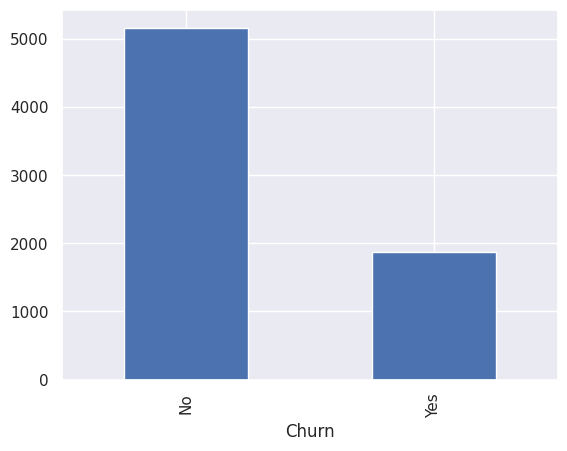

In [8]:
# Calcular la cantidad de clientes que abandonaron (churn) y los que no
churn_count = fuga["Churn"].value_counts ()
print(churn_count)
# Visualizar la cantidad de clientes que abandonaron (churn) y los que no
fuga["Churn"].value_counts().plot(kind="bar")

El 26.5% de clientes ha abandonado la companía.

In [9]:
fuga["Churn"] = fuga["Churn"].replace(['No'],'0')
fuga["Churn"] = fuga["Churn"].replace(['Yes'],'1')
fuga["Churn"] = fuga["Churn"].astype('int')

In [10]:
fuga.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,9237-HQITU


### *4.2* Análisis de variables cuantitativas

In [11]:
#analisis rapido de los campos numericos
fuga.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000



* La variable "SeniorCitizen" no tiene interpretación respecto al valor promedio.
* La variable "Tenure" se determina que el promedio es de 32.37 meses en el que un cliente permaneció en la empresa y los datos no presentan dispersión puesto que la desviación es menor al valor promedio y cercano a la mediana.
* La variable "MonthlyCharges" se determina que el promedio es de 64.76 unidades en el que un cliente paga mensualmente y los datos no presentan dispersión puesto que la desviación es menor al valor promedio y cercano a la mediana.
* La variable "TotalCharges" si obversamos que presenta dispersión alta debido a que el valor promedio está muy cercano a la desviación y muy alejado de la mediana.

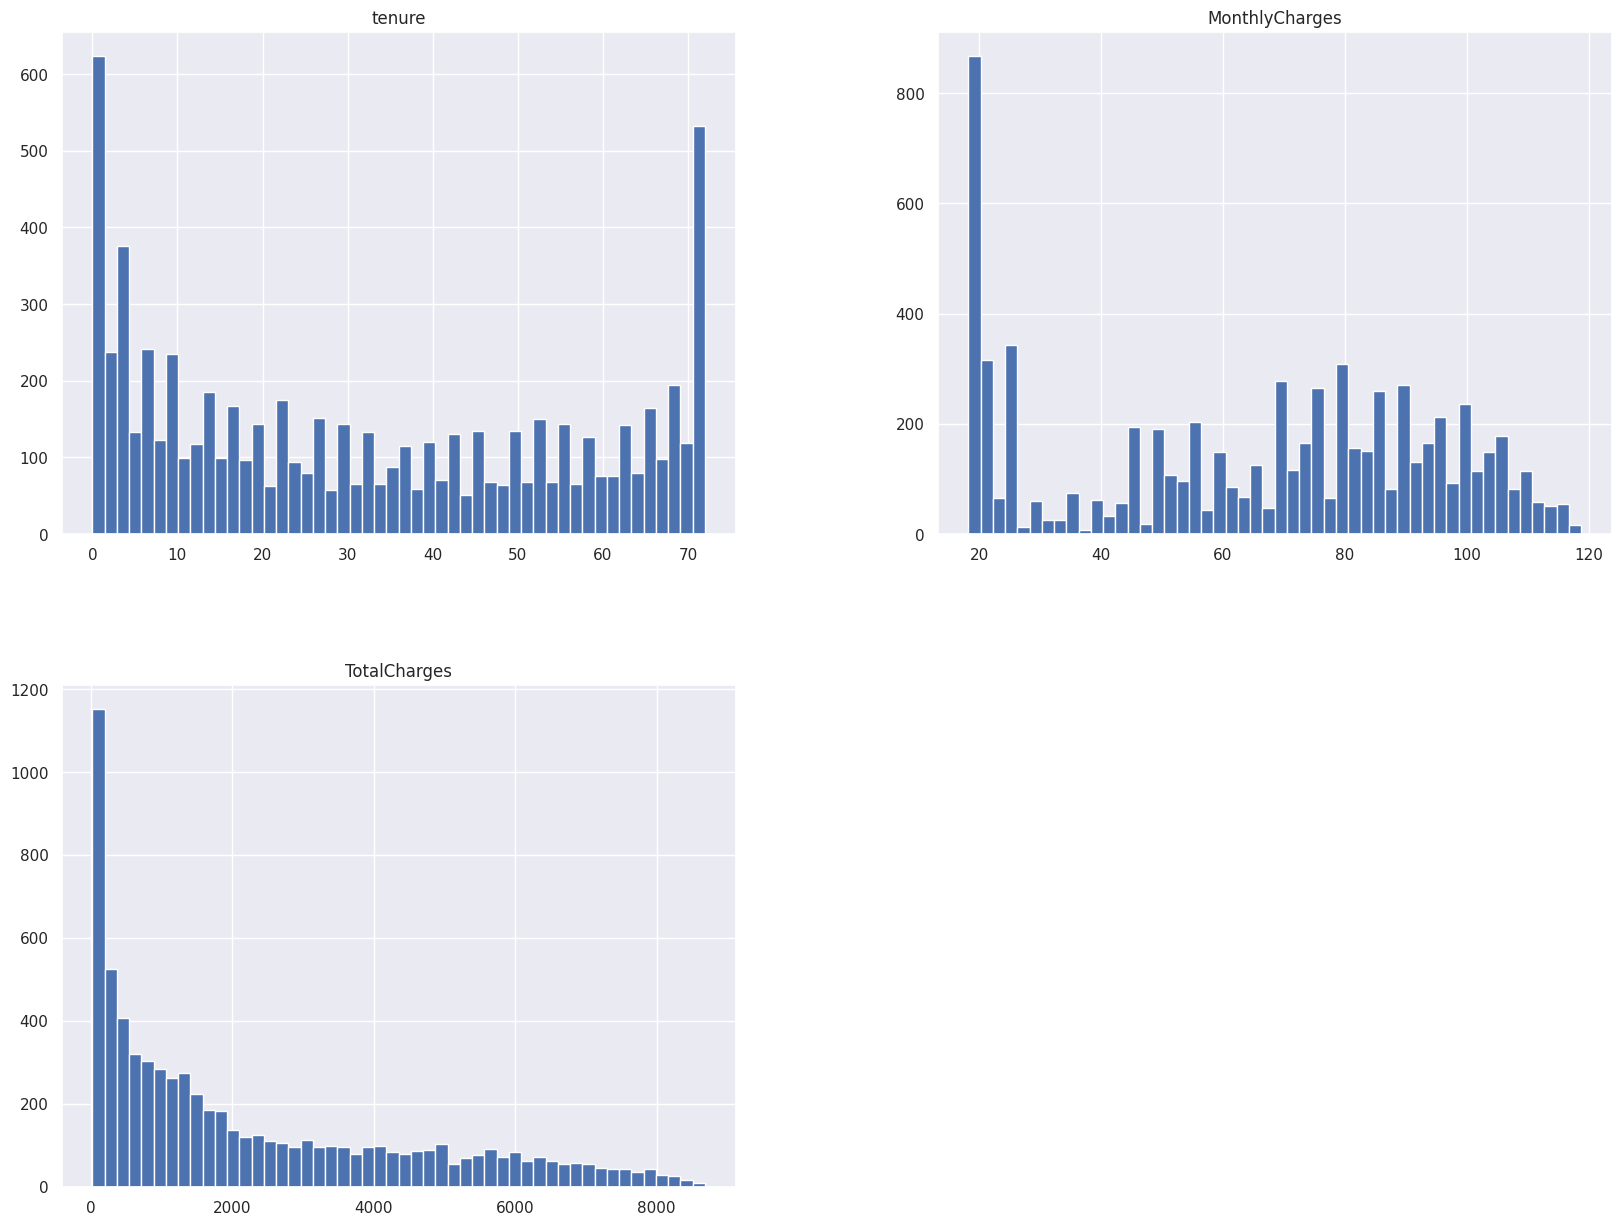

In [12]:
columns_to_include = ['tenure', 'MonthlyCharges', 'TotalCharges']
fuga[columns_to_include].hist(bins = 50, figsize=(20,15))
plt.show()

<Axes: >

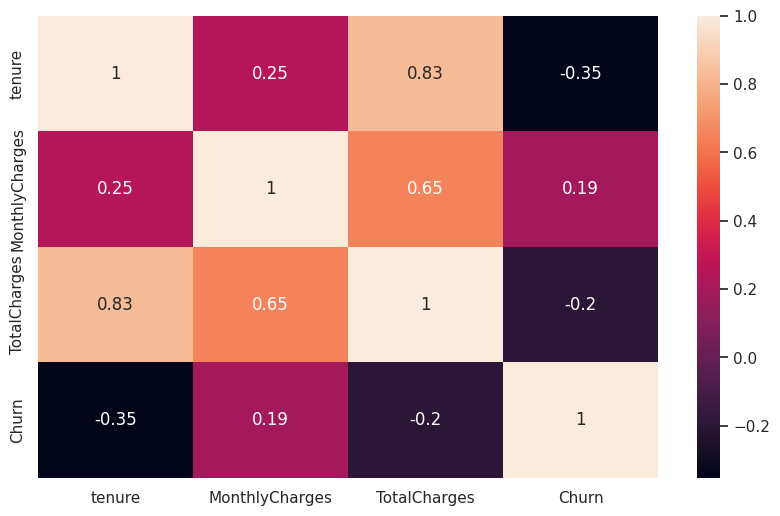

In [13]:
corr = fuga[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

##5. Insights o hallazgos relevantes del caso de uso

In [14]:
categorical_attributes = fuga.select_dtypes(include=['object'])

In [15]:
categorical_attributes.dtypes

,0
gender,object
Partner,object
Dependents,object
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>
  </tr>
  <tr>
    <td>Churn</td>
    <td>Si el cliente abandonó o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí o No)</td>
  </tr>
  <tr>
    <td>CustomerID</td>
    <td>Identificación del cliente</td>
    <td>string</td>
    <td></td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Si el cliente es hombre o mujer</td>
    <td>Categorico Nominal</td>
    <td>(Male,Female)</td>
  </tr>
  <tr>
    <td>SeniorCitizen</td>
    <td>Si el cliente es adulto mayor o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(0,1)</td>
  </tr>
  <tr>
    <td>Partner</td>
    <td>Si el cliente tiene pareja o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>Dependets</td>
    <td>Si el cliente tiene dependientes o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>Tenure</td>
    <td>Número de meses que el cliente ha permanecido en la empresa</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>PhoneService</td>
    <td>Si el cliente tiene servicio telefónico o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>MultipleLines</td>
    <td>Si el cliente tiene varias líneas o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio telefónico)</td>
  </tr>
  <tr>
    <td>InternetService</td>
    <td>Proveedor de servicios de Internet del cliente</td>
    <td>Categorico nominal</td>
    <td>(DSL, Fibra óptica, No)</td>
  </tr>
  <tr>
    <td>OnlineSecurity</td>
    <td>Si el cliente tiene seguridad en línea o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No, Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>OnlineBackup</td>
    <td>Si el cliente tiene respaldo en línea o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No, Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>DeviceProtection</td>
    <td>Si el cliente tiene protección de dispositivo o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>TechSupport</td>
    <td>Si el cliente cuenta con soporte técnico o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>StreamingTV</td>
    <td>Si el cliente tiene transmisión de TV o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>StreamingMovies</td>
    <td>Si el cliente tiene películas en streaming o no</td>
    <td>Categorico nominal</td>
    <td>(Sí, No,Sin servicio de Internet)</td>
  </tr>
  <tr>
    <td>Contract</td>
    <td>El plazo del contrato del cliente</td>
    <td>Categorico nominal</td>
    <td>(Mes a mes, Un año, Dos años)</td>
  </tr>
  <tr>
    <td>Paperlessbilling</td>
    <td>Si el cliente tiene facturación electrónica o no</td>
    <td>Categorico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>PaymentMethod</td>
    <td>El método de pago del cliente</td>
    <td>Categorico nominal</td>
    <td>(Cheque electrónico, Cheque enviado por correo, Transferencia bancaria)</td>
  </tr>
  <tr>
    <td>MonthlyChargues</td>
    <td>El monto cobrado al cliente mensualmente</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>TotalChargues</td>
    <td>El importe total cobrado al cliente</td>
    <td>Discreto</td>
    <td></td>
  </tr>
</table>

In [16]:
fuga[['gender', 'Churn']].groupby(['gender'], as_index=False).agg(['count','sum','mean'])

gender Churn               
          count  sum      mean
0  Female  3488  939  0.269209
1    Male  3555  930  0.261603

La variable "Gender" no discrimina el comportamiento del Target.



In [17]:
fuga[['Partner', 'Churn']].groupby(['Partner'], as_index=False).agg(['count','sum','mean'])

Partner Churn                
          count   sum      mean
0      No  3641  1200  0.329580
1     Yes  3402   669  0.196649

La variable "Partner" si discrimina el comportamiento del Target.

In [18]:
fuga[['Dependents', 'Churn']].groupby(['Dependents'], as_index=False).agg(['count','sum','mean'])

Dependents Churn                
             count   sum      mean
0         No  4933  1543  0.312791
1        Yes  2110   326  0.154502

La variable "Dependents" si discrimina el comportamiento del Target.

In [19]:
fuga[['PhoneService', 'Churn']].groupby(['PhoneService'], as_index=False).agg(['count','sum','mean'])

PhoneService Churn                
               count   sum      mean
0           No   682   170  0.249267
1          Yes  6361  1699  0.267096

La variable "Phone Service" no discrimina el comportamiento del Target.

In [20]:
fuga[['MultipleLines', 'Churn']].groupby(['MultipleLines'], as_index=False).agg(['count','sum','mean'])

MultipleLines Churn               
                    count  sum      mean
0                No  3390  849  0.250442
1  No phone service   682  170  0.249267
2               Yes  2971  850  0.286099

La variable "MultipleLines" no discrimina el comportamiento del Target.

In [21]:
fuga[['InternetService', 'Churn']].groupby(['InternetService'], as_index=False).agg(['count','sum','mean'])

InternetService Churn                
                  count   sum      mean
0             DSL  2421   459  0.189591
1     Fiber optic  3096  1297  0.418928
2              No  1526   113  0.074050

La variable "InternetService" si discrimina el comportamiento del Target.

In [22]:
fuga[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity'], as_index=False).agg(['count','sum','mean'])

OnlineSecurity Churn                
                       count   sum      mean
0                   No  3498  1461  0.417667
1  No internet service  1526   113  0.074050
2                  Yes  2019   295  0.146112

La variable "OnlineSecurity" si discrimina el comportamiento del Target.

In [23]:
fuga[['OnlineBackup', 'Churn']].groupby(['OnlineBackup'], as_index=False).agg(['count','sum','mean'])

OnlineBackup Churn                
                       count   sum      mean
0                   No  3088  1233  0.399288
1  No internet service  1526   113  0.074050
2                  Yes  2429   523  0.215315

La variable "OnlineBackup" si discrimina el comportamiento del Target.

In [24]:
fuga[['DeviceProtection', 'Churn']].groupby(['DeviceProtection'], as_index=False).agg(['count','sum','mean'])

DeviceProtection Churn                
                       count   sum      mean
0                   No  3095  1211  0.391276
1  No internet service  1526   113  0.074050
2                  Yes  2422   545  0.225021

La variable "DeviceProtection" si discrimina el comportamiento del Target.

In [25]:
fuga[['TechSupport', 'Churn']].groupby(['TechSupport'], as_index=False).agg(['count','sum','mean'])

TechSupport Churn                
                       count   sum      mean
0                   No  3473  1446  0.416355
1  No internet service  1526   113  0.074050
2                  Yes  2044   310  0.151663

La variable "TechSupport" si discrimina el comportamiento del Target.

In [26]:
fuga[['StreamingTV', 'Churn']].groupby(['StreamingTV'], as_index=False).agg(['count','sum','mean'])

StreamingTV Churn               
                       count  sum      mean
0                   No  2810  942  0.335231
1  No internet service  1526  113  0.074050
2                  Yes  2707  814  0.300702

La variable "StreamingTV" no discrimina el comportamiento del Target.

In [27]:
fuga[['StreamingMovies', 'Churn']].groupby(['StreamingMovies'], as_index=False).agg(['count','sum','mean'])

StreamingMovies Churn               
                       count  sum      mean
0                   No  2785  938  0.336804
1  No internet service  1526  113  0.074050
2                  Yes  2732  818  0.299414

La variable "StreamingMovies" no discrimina el comportamiento del Target.

In [28]:
fuga[['Contract', 'Churn']].groupby(['Contract'], as_index=False).agg(['count','sum','mean'])

Contract Churn                
                  count   sum      mean
0  Month-to-month  3875  1655  0.427097
1        One year  1473   166  0.112695
2        Two year  1695    48  0.028319

La variable "Contract" si discrimina el comportamiento del Target.

In [29]:
fuga[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling'], as_index=False).agg(['count','sum','mean'])

PaperlessBilling Churn                
                   count   sum      mean
0               No  2872   469  0.163301
1              Yes  4171  1400  0.335651

La variable "PaperlessBilling" si discrimina el comportamiento del Target.

In [30]:
fuga[['PaymentMethod', 'Churn']].groupby(['PaymentMethod'], as_index=False).agg(['count','sum','mean'])

PaymentMethod Churn                
                             count   sum      mean
0  Bank transfer (automatic)  1544   258  0.167098
1    Credit card (automatic)  1522   232  0.152431
2           Electronic check  2365  1071  0.452854
3               Mailed check  1612   308  0.191067

La variable "PaymentMethod" si discrimina el comportamiento del Target.

Del total de variables revisadas, nos quedamos con:
*   PaymentMethod
*   PaperlessBilling
*   Contract
*   TechSupport
*   DeviceProtection
*   OnlineBackup
*   OnlineSecurity
*   InternetService
*   Dependents
*   Partners
*   Tenure